<a href="https://colab.research.google.com/github/YoshGreen/PROYECTO-FINAL-IA-INF---372-DAT---245/blob/main/Aprendizaje_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------

# ***APRENDIZAJE NO SUPERVISADO***



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columnas corregidas:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Conteo por cluster (K-means):
kmeans_cluster
1    381
0    188
Name: count, dtype: int64

Conteo por cluster (DBSCAN):
dbscan_cluster
-1    371
 1    181
 0     12
 2      3
 3      2
Name: count, dt

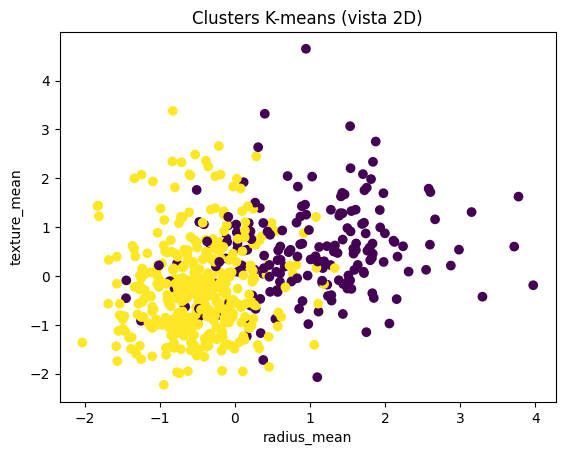

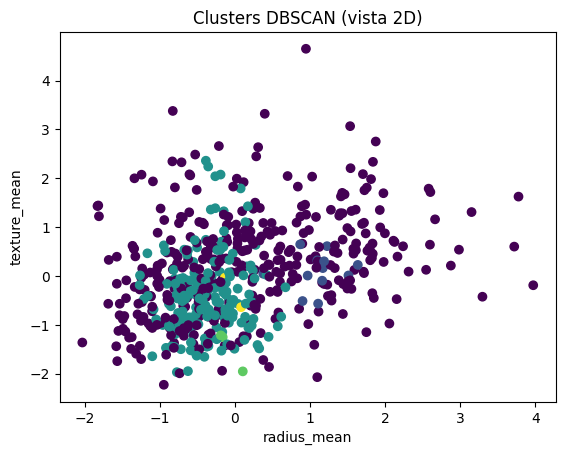

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

ruta = "/content/drive/MyDrive/data/dataset_mama.csv"

df = pd.read_csv(ruta, sep=";")

print("Columnas corregidas:")
print(df.columns)

df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Seleccionar variables numéricas
X = df.drop(columns=["diagnosis", "id"])

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df["kmeans_cluster"] = kmeans_labels

print("\nConteo por cluster (K-means):")
print(df["kmeans_cluster"].value_counts())

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df["dbscan_cluster"] = dbscan_labels

print("\nConteo por cluster (DBSCAN):")
print(df["dbscan_cluster"].value_counts())

#grafico K-means
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
plt.title("Clusters K-means (vista 2D)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

# grafico DBSCAN
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
plt.title("Clusters DBSCAN (vista 2D)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()


#**NO SUPERVISADO CON PCA**





Mounted at /content/drive


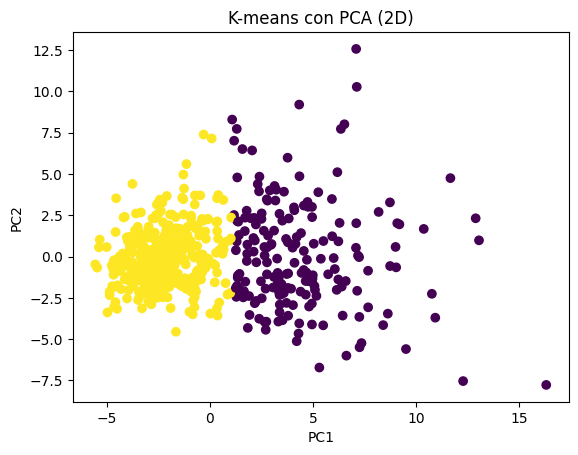

Clusters K-means:
1    378
0    191
Name: count, dtype: int64


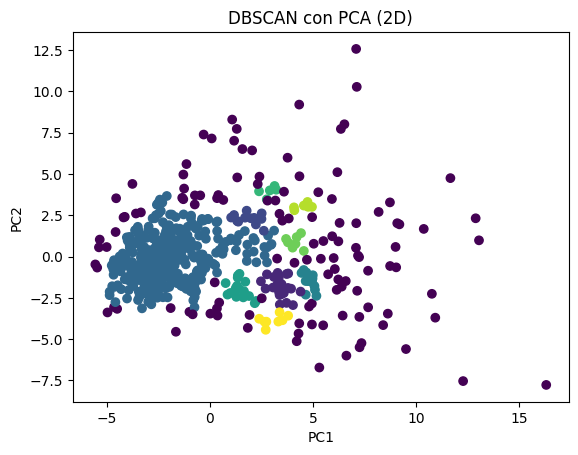

Clusters DBSCAN:
 2    357
-1    119
 0     25
 4     17
 3     13
 1     12
 8      8
 6      7
 7      6
 5      5
Name: count, dtype: int64


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

ruta = "/content/drive/MyDrive/data/dataset_mama.csv"

df = pd.read_csv(ruta, sep=";")

# Eliminar columnas no necesarias
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Guardar diagnosis solo para análisis posterior
y_real = df["diagnosis"].map({"M": 1, "B": 0})

# Quitar diagnosis para clustering
X = df.drop(columns=["diagnosis"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.title("K-means con PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Clusters K-means:")
print(pd.Series(kmeans_labels).value_counts())

dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels)
plt.title("DBSCAN con PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Clusters DBSCAN:")
print(pd.Series(dbscan_labels).value_counts())
